In [2]:
import pm4py
import log_sampling
import log_representativeness
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

logs = ["sepsis", "rtfm", "hd2017"]

# Inductive

/var/folders/3l/9typbyvd4kz6lfywyxbn75q00000gn/T/ipykernel_10504/3259921748.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_log], axis=0, ignore_index=True)
/Users/felixgross/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/felixgross/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/felixgross/minico

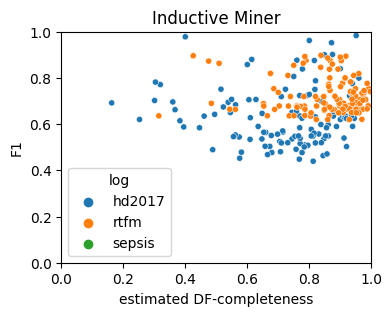

In [39]:
logs = [ "hd2017", "rtfm", "sepsis"]

column_names = ["log", "sample_ratio", "completeness", "fitness", "precision", "F1"]
df = pd.DataFrame(columns=column_names)

for name in logs:
    df_log = pd.read_csv("output/out_" + name + "_inductive.csv")
    df = pd.concat([df, df_log], axis=0, ignore_index=True)
    
plt.figure(figsize=(4, 3))
plt.title("Inductive Miner")
sns.scatterplot(x="completeness", y="F1", hue="log", data=df, s=20)
plt.xlabel("estimated DF-completeness")
plt.ylabel("F1")
plt.xlim((0,1))
plt.ylim((0,1))
plt.savefig("output/inductive.pdf", bbox_inches="tight")  
plt.show()


In [40]:
for log in logs:
    log_rows = df[df["log"] == log]
    
    rho, p_value = spearmanr(log_rows["completeness"], log_rows["F1"])
    print(f"{log}: rho = {rho}, p = {p_value}")

    max_f1 = log_rows.loc[log_rows["F1"].idxmax()]
    print(f"log: {log}, max. F1: {max_f1['F1']} w. completeness {max_f1['completeness']}")

    max_compl = log_rows.loc[log_rows["completeness"].idxmax()]
    print(f"log: {log}, max. completeness: {max_compl['completeness']} w. F1 {max_compl['F1']}")
    print("--------")



hd2017: rho = 0.05031530624413816, p = 0.5852355258658055
log: hd2017, max. F1: 0.9834248295735016 w. completeness 0.951219512195122
log: hd2017, max. completeness: 0.96 w. F1 0.7994072526874201
--------
rtfm: rho = 0.03305765045313257, p = 0.7200170247121342
log: rtfm, max. F1: 0.8979497718961441 w. completeness 0.8378378378378378
log: rtfm, max. completeness: 0.9965397923875432 w. F1 0.7411502714580115
--------
sepsis: rho = nan, p = nan
log: sepsis, max. F1: -1.0 w. completeness -1.0
log: sepsis, max. completeness: -1.0 w. F1 -1.0
--------


## EXAMPLE FOR NOISE 

without noise


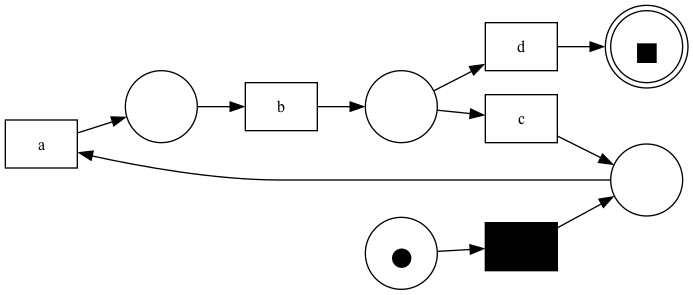

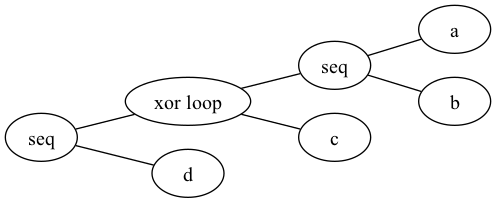

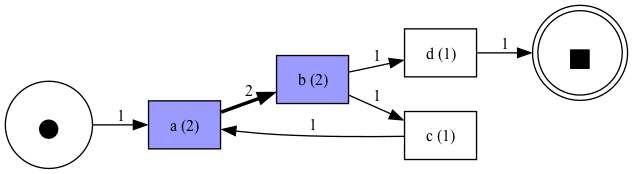

with noise


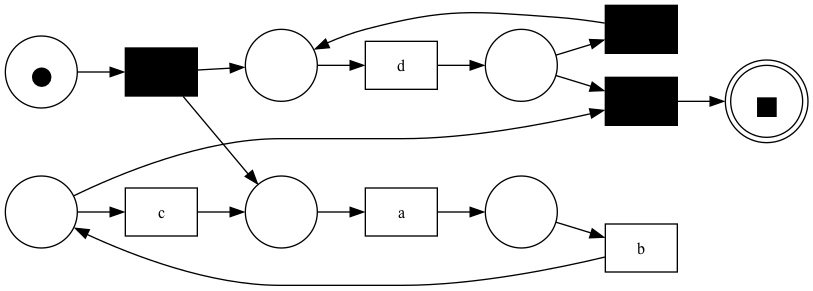

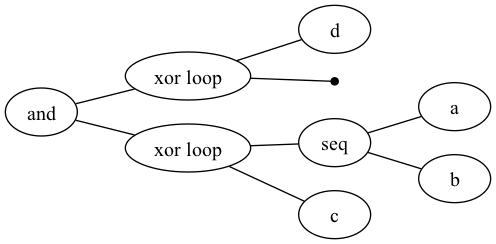

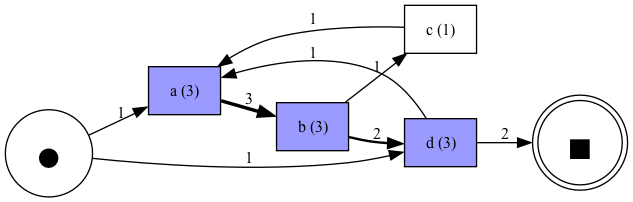

In [41]:
example_log = pm4py.parse_event_log_string(["a,b,c,a,b,d"])
example_log_noise = pm4py.parse_event_log_string(["a,b,c,a,b,d", "d,a,b,d"])

print("without noise")
net, im, fm = pm4py.discover_petri_net_inductive(example_log)
pm4py.view_petri_net(net, im, fm)
tree = pm4py.discover_process_tree_inductive(example_log)
pm4py.view_process_tree(tree)
dfg, start, end = pm4py.discover_dfg(example_log)
pm4py.view_dfg(dfg, start, end)

print("with noise")
net_noise, im_noise, fm_noise = pm4py.discover_petri_net_inductive(example_log_noise)
pm4py.view_petri_net(net_noise, im_noise, fm_noise)
tree_noise = pm4py.discover_process_tree_inductive(example_log_noise)
pm4py.view_process_tree(tree_noise)
dfg_noise, start_noise, end_noise = pm4py.discover_dfg(example_log_noise)
pm4py.view_dfg(dfg_noise, start_noise, end_noise)

# Alpha

/Users/felixgross/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/felixgross/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/felixgross/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/felixgross/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

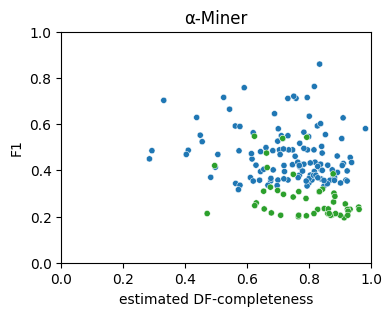

In [43]:
df = pd.read_csv("output/out_alpha.csv")

plt.figure(figsize=(4, 3))
sns.scatterplot(x="completeness", y="F1", hue="log", data=df, s=20)
plt.xlabel("estimated DF-completeness")
plt.legend().set_visible(False)
plt.xlim((0,1))
plt.ylim((0,1))
plt.title("\u03B1-Miner")
plt.ylabel("F1")
plt.savefig("output/alpha.pdf", bbox_inches="tight")  
plt.show()


In [44]:
logs_ = ["sepsis", "hd2017"]


for log in logs_:
    log_rows = df[df["log"] == log]

    rho, p_value = spearmanr(log_rows["completeness"], log_rows["F1"])
    print(f"{log}: rho = {rho}, p = {p_value}")

    max_f1 = log_rows.loc[log_rows["F1"].idxmax()]
    print(f"log: {log}, max. F1: {max_f1['F1']} w. completeness {max_f1['completeness']}")

    max_compl = log_rows.loc[log_rows["completeness"].idxmax()]
    print(f"log: {log}, max. completeness: {max_compl['completeness']} w. F1 {max_compl['F1']}")

    print("--------")

sepsis: rho = -0.3930887125958147, p = 0.004744203458883588
log: sepsis, max. F1: 0.5475140940963779 w. completeness 0.6231155778894473
log: sepsis, max. completeness: 0.9606918238993712 w. F1 0.2309965439013777
--------
hd2017: rho = -0.1771307029237301, p = 0.052942113291873365
log: hd2017, max. F1: 0.8598496493764325 w. completeness 0.8333333333333334
log: hd2017, max. completeness: 0.9813084112149534 w. F1 0.5805087931733932
--------
